## Teoria

#### Expressar a distribuição Poisson na forma de Família Exponencial

Podemos expressar a distribuição Poisson na forma de Família Exponencial?

Primeiramente, se tivermos uma variável aleatória $$ X ∼
ExpFam (θ)$$ tal que, podemos expressar sua função de probabilidade da seguinte forma:

$$
P 
X
 (X=x∣θ)=h(x)⋅e^{η(θ)⋅T(x)−A(θ)} 
 \ \ (1)
$$

Supondo que temos uma variável $ Y $ distribuída como uma Poisson com um parâmetro $λ$ (lambda)

$$ Y ∼ Poisson(λ) $$  

com sua função de probabilidade sendo:

$$ PY(Y=y | λ)=\frac{e^{−λ}λ^y}{y!} $$

Sabemos que:

$$ PY(Y=y | λ)=\frac{e^{−λ}λ^y}{y!} = $$
$$ \frac{1}{y!}e^{-λ}λ^y= $$
$$ \frac{1}{y!}e^{log(e^{-λ}λ^y)} = $$
$$ \frac{1}{y!}e^{log(e^{-λ})+log(λ^y)} = $$
$$ \frac{1}{y!}e^{-λ + y \ log(λ)} = $$
$$ \frac{1}{y!}e^{y \ log(λ) -λ}$$

Assim:

$$ Py(Y=y | λ)=\frac{1}{y!}e^{ylog(λ)−λ} \ (2) $$

A equação (2) tem a mesma forma que a equação (1):

$$
θ=λ\\
h(y)=\frac{1}{y!}\\
η(λ)=log(λ)\\
T(y)=y\\
A(λ)=λ\\
$$

e, assim,

$$ Py(Y=y | λ)=h(y)e^{η(λ)T(y)−A(λ)} \ (3) $$

Dessa forma podemos afirmar que $$Y∼ExpFam(λ)$$

#### Método de máxima probabilidade de log


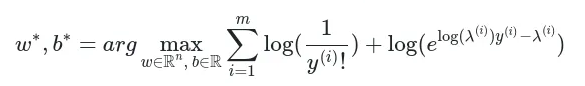

#### Função de Loss

$$loss = \frac{1}{m} \sum^{m}_{i = 1}\hat{y}^{(i)} - log(\hat{y}^{(i)})y^{(i)}$$

#### Derivação da Função de Loss


$$ \frac{∂}{∂w}loss=0$$

$$\frac{∂}{∂w}loss = \frac{1}{m} \sum^{m}_{i = 1}\hat{y}^{(i)} - y^{(i)}$$


#### Forma Matricial

Vamos precisar de uma matriz $X$ com dimensoes $(m,n)$ e um vetor de respostas $Y$
$$
X = 
\begin{pmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_n \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_n \\
\vdots & \vdots & \ddots & \vdots \\ 
x^{(m)}_1 & x^{(m)}_2 & \ldots & x^{(m)}_n
\end{pmatrix}
\ \ \ \ \ \ \ 
Y = 
\begin{pmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)} 
\end{pmatrix}
$$

Precisamos também de um vetor de features $w$ e um viés $b$
$$
w =
\begin{pmatrix}
  w_1 \\
  w_2 \\
  \vdots \\
  w_n
\end{pmatrix}
\ \ \ \ \ \ \ \
b = \begin{pmatrix}
  b \\
  b \\
  \vdots \\
  b
\end{pmatrix}
$$

$$
Z=Xw+b⃗ =>
\begin{pmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_n \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_n \\
\vdots & \vdots & \ddots & \vdots \\ 
x^{(m)}_1 & x^{(m)}_2 & \ldots & x^{(m)}_n
\end{pmatrix}
\begin{pmatrix}
  w_1 \\
  w_2 \\
  \vdots \\
  w_n
\end{pmatrix}
\begin{pmatrix}
  b \\
  b \\
  \vdots \\
  b
\end{pmatrix}
\ \ \ \ \ \ \ \
$$

## Carga e divisão dos dados

In [10]:
#faz os imports necessarios
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
#carga dos dados
df = pd.read_csv('https://raw.githubusercontent.com/FelipeMMMendes/TrabalhoOCD/main/data/Dados_Poisson.csv')

In [12]:
df.head()

,Ppcode,Age,Sex,Love_music,Gigs
0,368,22,0,3.5,6
1,42,18,0,1.0,2
2,509,47,0,1.3,3
3,43,20,0,3.7,8
4,352,19,0,1.9,9


In [13]:
df.shape

(257, 5)

In [14]:
#separando as variaveis explicativas e as alvo
y = df['Gigs']
x = df[['Age','Sex','Love_music']]

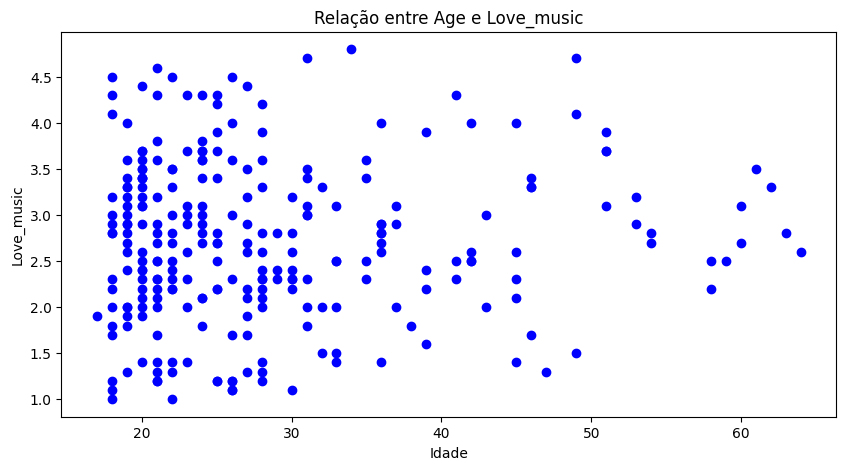

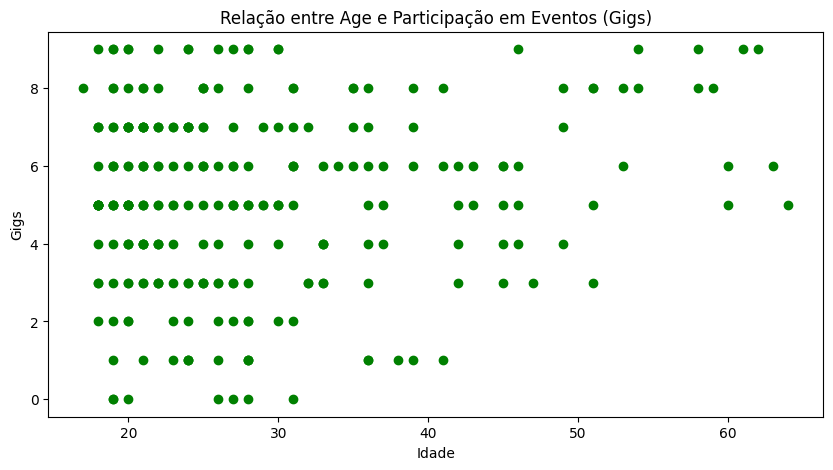

In [15]:
import matplotlib.pyplot as plt

# Gráfico relacionando Age com Love_music
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'], df['Love_music'], color='blue')
plt.title('Relação entre Age e Love_music')
plt.xlabel('Idade')
plt.ylabel('Love_music')
plt.show()

# Gráfico relacionando Age com Gigs
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'], df['Gigs'], color='green')
plt.title('Relação entre Age e Participação em Eventos (Gigs)')
plt.xlabel('Idade')
plt.ylabel('Gigs')
plt.show()

## Usando o Scikit

In [16]:
#fazendo o train test split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [17]:
#instanciando o modelo do scikit learn
modelScikit = linear_model.PoissonRegressor()

In [18]:
#treinando o modelo
modelScikit.fit(X_train,Y_train)

PoissonRegressor()

In [19]:
#pegando os betas
modelScikit.coef_

array([0.00624079, 0.04545436, 0.13305131])

## Usando o statsmodels

In [20]:
#fazendo os imports necessarios
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
#instancia o modelo (parecido com R)
modelSM = smf.glm(formula="Gigs ~ Sex + Love_music + Age",data=df, family=sm.families.Poisson())

In [22]:
#treina o modelo
result = modelSM.fit()

In [23]:
#printa um relatório do desempenho e performance
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Gigs   No. Observations:                  257
Model:                            GLM   Df Residuals:                      253
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -568.07
Date:                Wed, 29 Nov 2023   Deviance:                       277.58
Time:                        06:14:37   Pearson chi2:                     233.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1618
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9490      0.116      8.165      0.0

In [24]:
# adiciona uma coluna de uns para a interceptação no modelo
X_with_intercept = sm.add_constant(x)

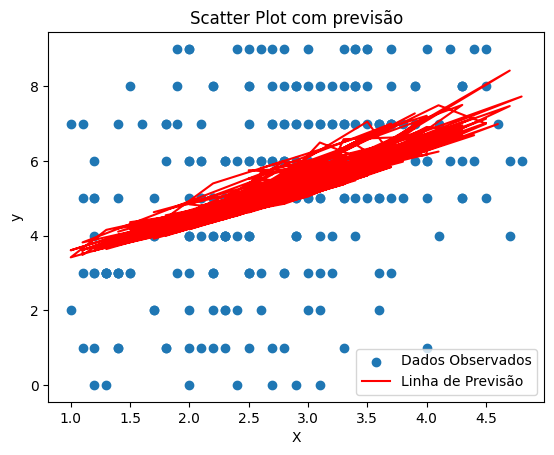

In [25]:
# gera previsoes do modelo
predictions = result.predict(X_with_intercept)

# cria um gráfico de dispersão com a linha de previsão
plt.scatter(x['Love_music'], y, label='Dados Observados')
plt.plot(x['Love_music'], predictions, color='red', label='Linha de Previsão')

# adiciona legendas, rótulos aos eixos e um título e exibe o grafico
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot com previsão')
plt.legend()
plt.show()

## Na mão

In [26]:
import numpy as np

$$ lnλ_i = b_0 + b_1x_i $$

$$ λ_i = exp(b_0 + b_1x_i) $$

In [27]:
def loss(x, y, w, b):
    # calcula as previsoes usando exponencial
    y_hat = np.exp(x @ w + b)
    
    # calcula a perda usando uma expressão pra Regressão de Poisson
    error = (y_hat - np.log(y_hat) * y).mean()
    
    # retorna o valor da perda
    return error
        

In [28]:
import numpy as np

def grad(x, y, w, b):
    # guarda as dimensoes da matriz de features x
    M, n = x.shape
    
    # calcula as previsões usando exponencial
    y_hat = np.exp(x @ w + b)
    
    # calcula os gradientes para w (betas) e b (vies)
    dw = (x.T @ (y_hat - y)) / M
    db = (y_hat - y).mean()
    
    return dw, db

def gradient_descent(x, y, w_0, b_0, alpha, num_iter):
    # inicializa os w's e o b
    w, b = w_0.copy(), b_0
    
    # cria um array pra guardar o registro da perda
    hist = np.zeros(num_iter)
    
    # guarda as dimensoes da matriz de features x
    M, n = x.shape
    
    # loop de otimização usando gradiente descendente
    for iter in range(num_iter):
        # calcula os gradientes usando grad
        dw, db = grad(x, y, w, b)
        
        # atualiza w e o b usando gradiente descendente
        w -= alpha * dw 
        b -= alpha * db
        
        # guarda o valor de perda no registro
        hist[iter] = loss(x, y, w, b)

    # retorna o w final, o b final e o registro da perda
    return w, b, hist


In [29]:
# guarda as dimensoes da matriz de features x
M, n = x.shape

# começa os betas iniciais como um vetor de peso
w_0 = np.zeros((n, ))

# armazena o intercept inicial como 1
b_0 = 1

# define o alpha
alpha = 0.0001

# chama a função gradient_descent para treinar o modelo
w, b, hist = gradient_descent(x, y, w_0, b_0, alpha, num_iter=14_000)


In [30]:
print(f"Valores finais dos betas: \n{w}")
print(f"Valor final do Intercept = {b}")

Valores finais dos betas: 
Age           0.004002
Sex           0.032218
Love_music    0.182719
dtype: float64
Valor final do Intercept = 1.0090257731794512
